In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the excel file into a pandas DataFrame

alldata = pd.read_excel('combined_data.xls')
alldata.set_index('Current residence in', inplace=True)
alldata.head()

,Population 1 year and over,Same house 1 year ago,Same state of residence 1 year ago,Total_Incoming,Total_Outgoing,Net Migration,Avg. Home Price,Percent of Job Growth,Alabama,Alaska,...,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total,Puerto Rico,U.S. Island Area,Foreign Country4,Foreign Country
Current residence in,,,,,,,,,,,,,,,,,,,,,
Alabama,4819343,4158224,535649,111803,101466,10337,129174.0000,1.09,0,424,...,4277,1289,1070,1121,104,13667,476,0,13191,0
Alaska,730874,595804,98168,30199,42972,-12773,291458.9167,-1.30,942,0,...,360,3653,0,2500,6,6703,0,965,5738,0
Arizona,6935358,5717189,911120,261727,163214,98513,228362.7500,2.52,1337,2255,...,3593,14392,318,3897,997,45322,438,91,44793,0
Arkansas,2968395,2509717,370309,79411,69850,9561,120987.0833,1.27,574,241,...,1087,1539,0,958,12,8958,573,0,8385,0
California,39085984,34009331,4234770,523131,661026,-137895,508307.1667,2.10,3715,2606,...,21162,33143,789,9348,1395,318752,1864,842,316046,0


In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = alldata["Percent of Job Growth"].values.reshape(-1, 1)
y = alldata["Avg. Home Price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (156, 1) (156, 1)


Text(0, 0.5, 'Avg. Home Price')

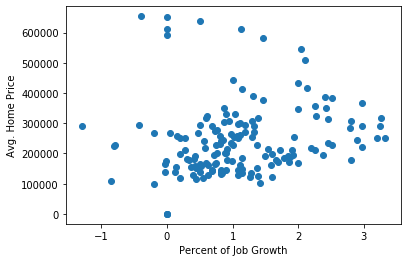

In [4]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Percent of Job Growth")
plt.ylabel("Avg. Home Price")

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [6]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[19553.38802981]]
y-axis intercept:  [218566.54277688]


In [9]:
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-1.3]]
Max X Value: [[3.32]]


In [10]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0, 0.5, 'Avg Home Price')

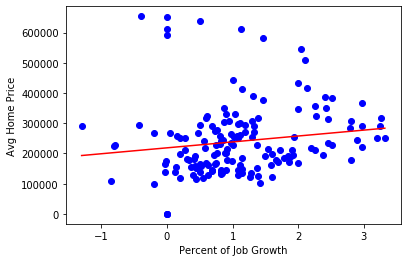

In [11]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Percent of Job Growth")
plt.ylabel("Avg Home Price")

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 20511717650.1348
R-squared (R2 ): 0.006322114638241172


In [13]:
model.score(X_test, y_test)

0.006322114638241172

In [14]:
## Is there a correlation with the Migration
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = alldata["Net Migration"].values.reshape(-1, 1)
y = alldata["Avg. Home Price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (156, 1) (156, 1)


Text(0, 0.5, 'Avg Home Price')

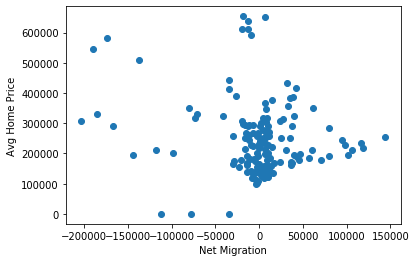

In [15]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Net Migration")
plt.ylabel("Avg Home Price")

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [17]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [18]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.52760016]]
y-axis intercept:  [239732.81280444]


In [20]:
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

In [21]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0, 0.5, 'Avg Home Price')

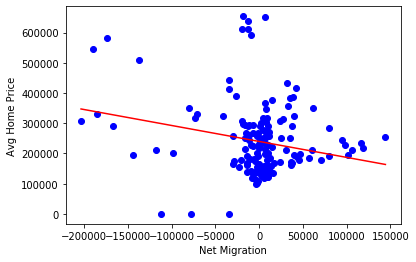

In [22]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Net Migration")
plt.ylabel("Avg Home Price")

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 21103512266.486988
R-squared (R2 ): -0.02234702136370892


In [24]:
model.score(X_test, y_test)

-0.022347021363708915

In [25]:
#Do two variables make a difference

# Assign the data to X and y

X = alldata[["Avg. Home Price", "Percent of Job Growth"]]
y = alldata["Net Migration"].values.reshape(-1, 1)
print(X.shape, y.shape)

(156, 2) (156, 1)


In [26]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [27]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [28]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.17856019978323945
Testing Score: 0.15529758169249785


Text(0.5, 1.0, 'Residual Plot')

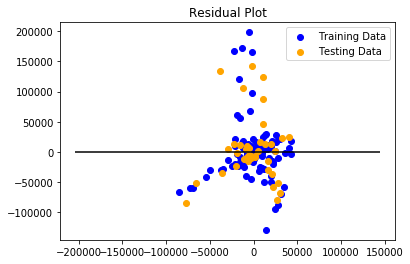

In [29]:
# Plot the Residuals for the Training and Testing data


plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [31]:
## Correlation of Net Migration and Job Growth
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = alldata["Percent of Job Growth"].values.reshape(-1, 1)
y = alldata["Net Migration"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (156, 1) (156, 1)


Text(0, 0.5, 'Net Migration')

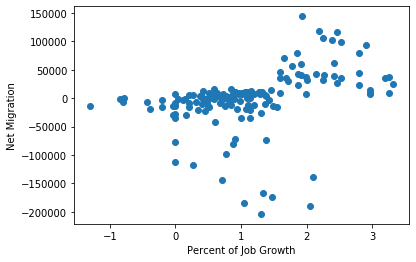

In [32]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Percent of Job Growth")
plt.ylabel("Net Migration")

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [34]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [35]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[17252.3675619]]
y-axis intercept:  [-18684.32819714]


In [37]:
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-1.3]]
Max X Value: [[3.32]]


In [38]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0, 0.5, 'Net Migration')

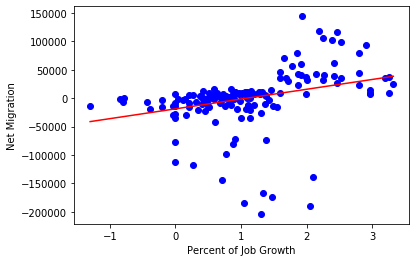

In [39]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Percent of Job Growth")
plt.ylabel("Net Migration")

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2754732018.259061
R-squared (R2 ): 0.16800151711259603


In [41]:
model.score(X_test, y_test)

0.16800151711259603